In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
g_table = pd.read_csv('../Output/Task2_step4.csv')
g_table.head()

,participant_ID,treatment,part,trial_no,setup_cost_red,setup_cost_blue,red_prior_prob,current_rounds,action_type,suspect,count_red_samples,count_blue_samples,evidence_found,evidence_suspect,posterior,true_guilty_suspect,suspect_accused,time
0,1.0,1.0,2.0,1.0,10.0,10.0,0.7,1,0,1.0,0,0,0,-1.0,0.700000,1.0,0.0,6016.7120
1,1.0,1.0,2.0,1.0,10.0,10.0,0.7,2,0,1.0,0,1,0,-1.0,0.756757,1.0,0.0,6733.3740
2,1.0,1.0,2.0,1.0,10.0,10.0,0.7,3,0,1.0,0,2,0,-1.0,0.805755,1.0,0.0,7383.4022
3,1.0,1.0,2.0,1.0,10.0,10.0,0.7,4,0,1.0,0,3,0,-1.0,0.846881,1.0,0.0,8000.0214
4,1.0,1.0,2.0,1.0,10.0,10.0,0.7,5,0,1.0,0,4,0,-1.0,0.880590,1.0,0.0,8716.7231


In [10]:
action = g_table.loc[(g_table['action_type'] == 1)]
bins = np.linspace(0, 1, 21)
data = np.array(action['posterior'].to_list())
digitized = np.digitize(data, bins)
bin_means_b = [data[digitized == i].mean() for i in range(1, len(bins))]

action = g_table.loc[(g_table['action_type'] == 1) & (g_table['red_prior_prob'] < 0.5)]
data = np.array(action['posterior'].to_list())
digitized = np.digitize(data, bins)
bin_means_r = [data[digitized == i].mean() for i in range(1, len(bins))]

action = g_table.loc[(g_table['action_type'] == 1) & (g_table['red_prior_prob'] > 0.5)]
data = np.array(action['posterior'].to_list())
digitized = np.digitize(data, bins)
bin_means_bu = [data[digitized == i].mean() for i in range(1, len(bins))]

<ipython-input-10-34e89ce73d89>:15: RuntimeWarning: Mean of empty slice.
  bin_means_bu = [data[digitized == i].mean() for i in range(1, len(bins))]
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


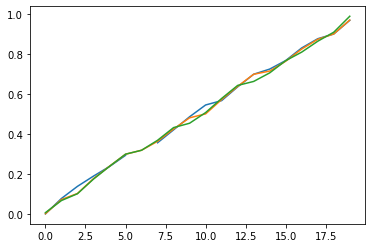

In [11]:
plt.plot(bin_means_bu)
plt.plot(bin_means_b)
plt.plot(bin_means_r)

In [12]:
print('high')
print(bin_means_bu)
print('low')
print(bin_means_r)
print('all')
print(bin_means_b)

high
[9.153674532102866e-07, 0.07731273760889656, 0.1380988108049153, 0.18936236007174206, 0.23749243728766214, 0.2934276349836121, nan, 0.3563796354494028, 0.42114201947320673, 0.4865926665054414, 0.545734327778856, 0.5675675675675674, 0.6363636363636362, 0.6997121253558912, 0.7255191508998616, 0.7683481527129735, 0.8314970512418058, 0.8776418873193068, 0.9012527721736119, 0.9699198080603361]
low
[0.006289671937723693, 0.06700669077500111, 0.1011176922467245, 0.1743925783338573, 0.23827550211915036, 0.29924336749353503, 0.3189037682964809, 0.3688143516425397, 0.4324324324324325, 0.454265672221144, 0.5076199122820045, 0.578346968862452, 0.6436203645505971, 0.6636485556800971, 0.7065723650163876, 0.7677241519024411, 0.8106376399282577, 0.8650384634472804, 0.9102919559592996, 0.9902303941609734]
all
[0.0010126698154222537, 0.07215240210285262, 0.10230169331338328, 0.17676848417190963, 0.23886930308823132, 0.29896007958335413, 0.3189037682964809, 0.3634969420807085, 0.4253141925131624, 0.